## Вторая лабораторная работа

Вам предоставлены медицинские данные людей, у которых определено наличие или отсутствие заболевания (столбец status).

**Ваше задание:**

1. Проанализировать данные (EDA).

2. Предобработать данные.

3. Скалировать/нормализовать данные.

4. Подготовить данные для обучения моделей.

5. Решить задачу бинарной классификации.

6. Попробовать несколько моделей для решения этой задачи, оценить точность каждой.

7. Получить значение accuracy больше 95%, построить матрицу путаницы и roc-кривую.

8. Сделать выводы.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/lab2.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Проанализируем данные


In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Видим, что в датасете 24 столбца. Посмотрим, есть ли пропущенные значения.

In [ ]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


Нет пропущенных значений. Это упросит предобработку. Теперь посмотрим статистику по числовым признакам

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.duplicated().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Построим гистограмму распределения признаков

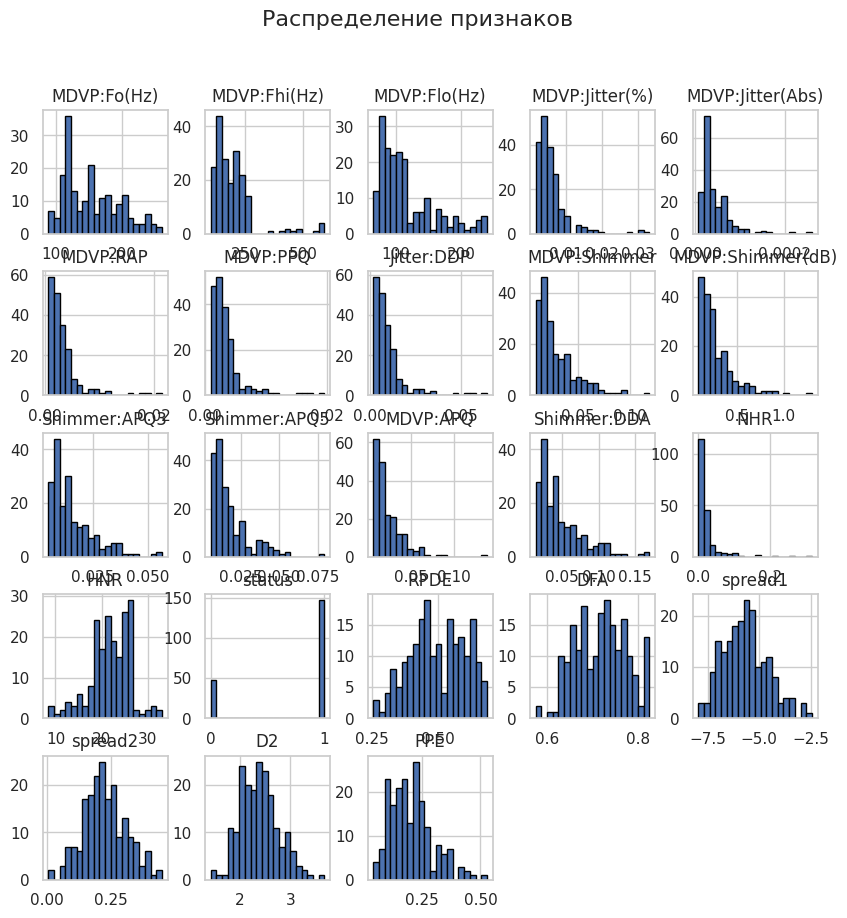

In [ ]:
sns.set(style="whitegrid")

df.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.suptitle('Распределение признаков', fontsize=16)
plt.show()

Boxplot для выявления выбросов

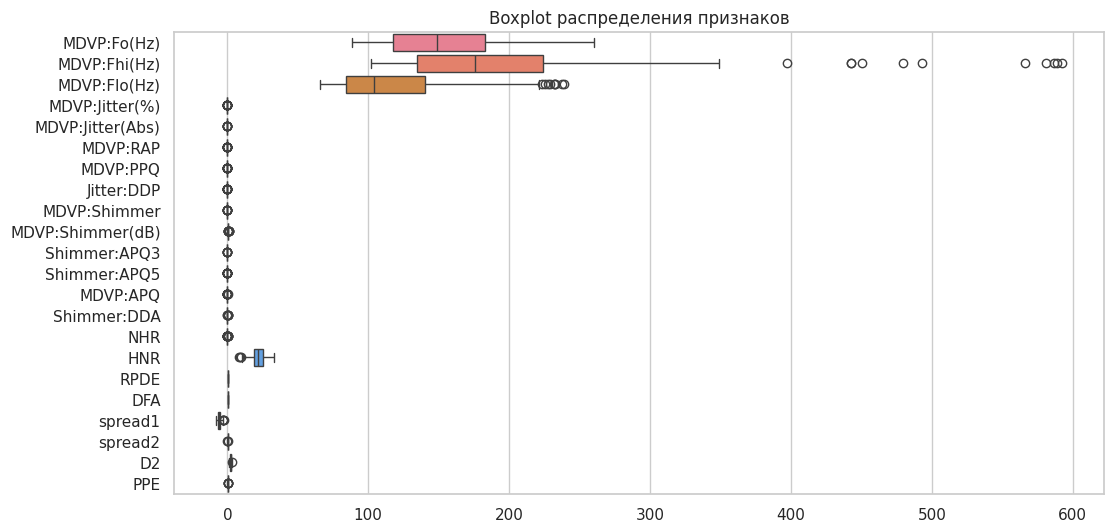

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['status']), orient='h')
plt.title("Boxplot распределения признаков")
plt.show()

Name - имя субъекта (?). Кажется, что данный столбец не очень информативный для определения статуса здоровья. Удалим ненужный столбец name

In [ ]:
df = df.drop(columns=["name"])

Посмотрим на распределение значений целевой переменной status:

In [ ]:
df["status"].value_counts(normalize=True)

,proportion
status,
1,0.753846
0,0.246154


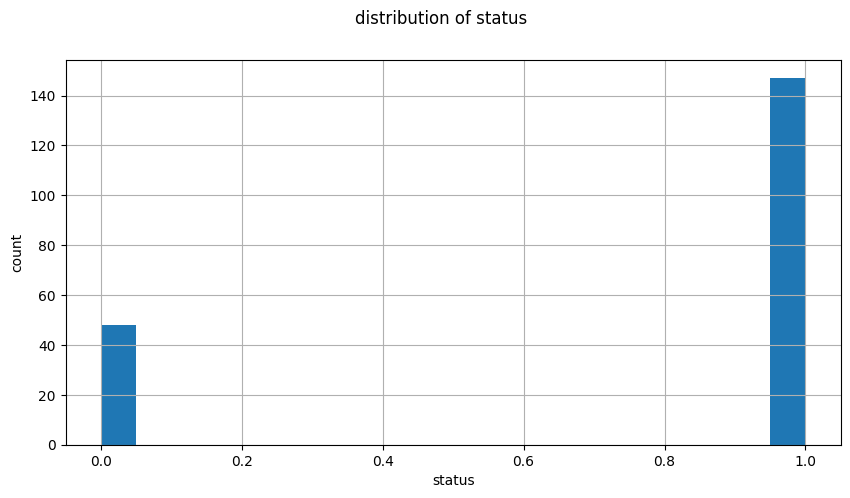

In [ ]:
plt.figure(figsize = (10, 5))

df['status'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('status')

plt.suptitle('distribution of status')
plt.show()

Видим, что значения распределены не ровно.

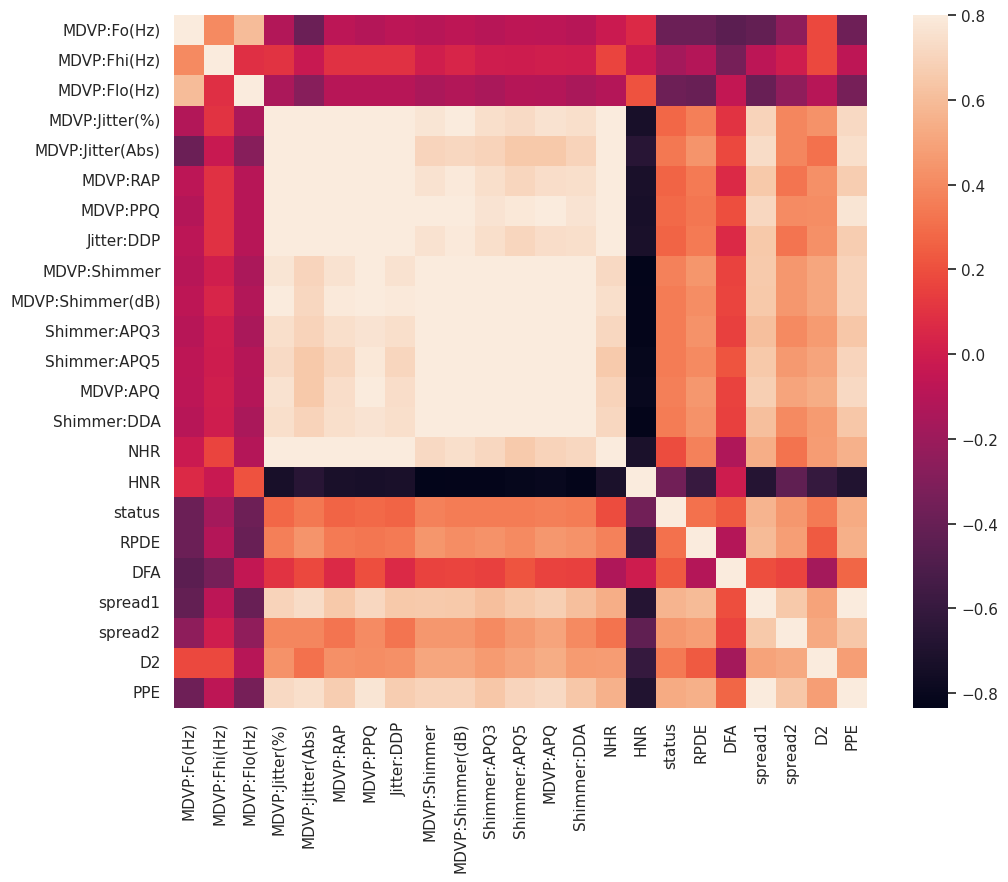

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

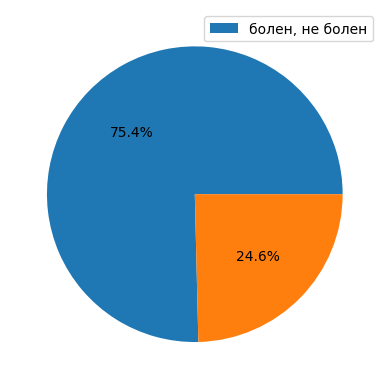

In [ ]:
data = df['status'].value_counts()
plt.pie(data, autopct='%1.1f%%')
plt.legend(['болен, не болен'])
plt.show()

Разделим на признаки и целевую переменную

In [ ]:
X = df.drop(columns=["status"])
y = df["status"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Разделяем на обучающую и тестовую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Скалируем данные

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((136, 22), (59, 22))

Решим задачу бинарной классификации

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 1. Обучим логистической регрессией

In [ ]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
#y_pred_lr = model_lr.predict(X_test_scaled)

LogisticRegression(random_state=42)

In [ ]:
y_pred_lr = model_lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

accuracy_lr

0.864406779661017

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.91      0.91      0.91        46

    accuracy                           0.86        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.86      0.86      0.86        59



### 2. k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.93      0.91      0.92        46

    accuracy                           0.88        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.89      0.88      0.88        59



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200, max_depth=10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.98      0.96      0.97        46

    accuracy                           0.95        59
   macro avg       0.92      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



Попробуем изменить параметры для рассмотренных ранее моделей

In [ ]:
model_knn_2 = KNeighborsClassifier(n_neighbors=3)
model_knn_2.fit(X_train, y_train)
y_pred_knn_2 = model_knn_2.predict(X_test)
print(classification_report(y_test, y_pred_knn_2))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

    accuracy                           0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59



Стало лучше, но не достаточно. Оставим RandomForest как лучший результат

Наконец-то получили 95% у accuracy. Построим матрицу ошибок и ROC-кривую.

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

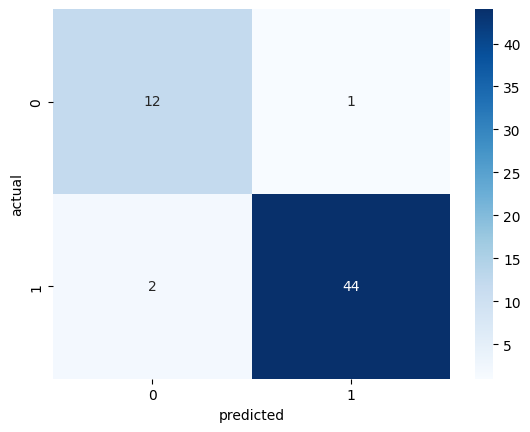

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

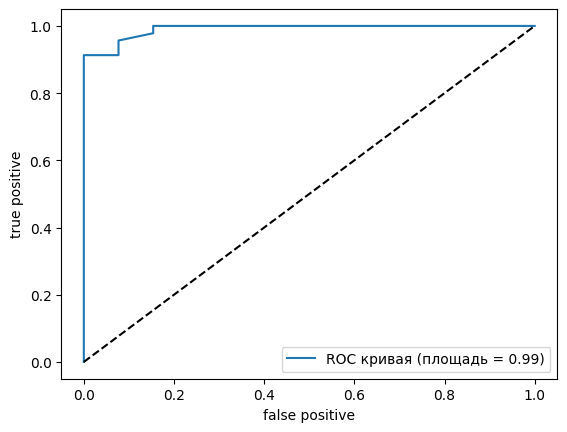

In [ ]:
plt.plot(fpr, tpr, label=f'ROC кривая (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.legend()
plt.show()

### Выводы

Мы протестировали три модели для решения задачи бинарной классификации, и получили следующие значения accuracy:

Логистическая регрессия → 0.79

K- ближайших соседей (KNN) → 0.90

Случайный лес (Random Forest) → 0.95

Random Forest показал наилучший результат. По матрице ошибок:

True Positive = 44 верно предсказаны как класс 1

True Negative = 12 верно предсказаны как класс 0

False Positive = 1 ошибочно классифицирован как 1

False Negative = 2  ошибочно классифицирован как 0

Получаем,  всего 3 ошибки из 59 предсказаний.

Площадь под roc-кривой = 0.99

